In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex4data.txt',delimiter=',', header = None)

In [3]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# Đổi tên cột
data.columns = ['x1','x2','y']

In [5]:
data.shape

(100, 3)

In [6]:
x1 = data.values[:,0]
x2 = data.values[:,1]
y = data.values[:,-1]

In [7]:
X = np.column_stack([np.ones_like(x1), x1, x2])

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scale = np.ones_like(X)
X_scale[:,1:] = scaler.fit_transform(X[:,1:])

## Output

In [33]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [34]:
def output(X, theta):
    return sigmoid(np.dot(X, theta))

## Cost function

In [35]:
def cost_function(X, y, theta):
    m = X.shape[0]
    y_pred = output(X, theta)
    return (-1/m)*(y@np.log(y_pred)+(1-y)@np.log(1-y_pred))

## Gradient Descent

In [36]:
def gradient_descent(X, y, theta, iterations = 1000, learning_rate = 0.1, stopping_threshold = 1e-5):
    m, n = X.shape
    current_theta = theta
    previous_cost = 0
    list_cost = []
    count = 0
    for i in range(iterations):
        f_wb = output(X, current_theta)
        current_cost = cost_function(X, y, current_theta)
        if abs(current_cost-previous_cost)<=stopping_threshold or current_cost > (1e+200):
            break
        previous_cost = current_cost
        count+=1
        list_cost.append(current_cost)
        gradient = (1/m)*np.dot(f_wb - y,X)
        current_theta = current_theta - learning_rate*gradient
        print(f'Iteration {i+1}: Cost {current_cost} Theta {current_theta}')
    return current_theta, list_cost, count

In [73]:
np.random.seed(30)
theta = np.random.randn(X_scale.shape[1])

In [74]:
theta1, list_cost1, count1 = gradient_descent(X_scale, y, theta)

Iteration 1: Cost 1.0904660235311026 Theta [-1.23523509  1.53320991 -0.93068568]
Iteration 2: Cost 1.0659994579833088 Theta [-1.20673082  1.53824167 -0.89109956]
Iteration 3: Cost 1.0420908172579406 Theta [-1.17854584  1.54300537 -0.85196072]
Iteration 4: Cost 1.018741898646096 Theta [-1.15068577  1.54750613 -0.81327694]
Iteration 5: Cost 0.9959537214914564 Theta [-1.12315586  1.55174937 -0.77505557]
Iteration 6: Cost 0.9737265093447988 Theta [-1.09596096  1.55574087 -0.73730355]
Iteration 7: Cost 0.9520596769485881 Theta [-1.06910553  1.5594867  -0.70002729]
Iteration 8: Cost 0.9309518223390919 Theta [-1.04259356  1.56299322 -0.6632327 ]
Iteration 9: Cost 0.9104007243493021 Theta [-1.01642862  1.56626706 -0.62692511]
Iteration 10: Cost 0.8904033457687437 Theta [-0.99061381  1.56931507 -0.59110928]
Iteration 11: Cost 0.8709558423630278 Theta [-0.96515176  1.57214435 -0.55578937]
Iteration 12: Cost 0.8520535778767021 Theta [-0.94004462  1.57476217 -0.52096888]
Iteration 13: Cost 0.83369

In [67]:
theta2, list_cost2, count2 = gradient_descent(X_scale, y, theta, learning_rate=0.0001) # learning_rate quá nhỏ

Iteration 1: Cost 1.059913279595876 Theta [-0.60752442 -0.12610591 -0.68456655]
Iteration 2: Cost 1.0598827091289056 Theta [-0.60750115 -0.12607541 -0.68452673]
Iteration 3: Cost 1.0598521397078442 Theta [-0.60747788 -0.12604491 -0.68448692]
Iteration 4: Cost 1.0598215713326955 Theta [-0.6074546  -0.12601441 -0.68444711]
Iteration 5: Cost 1.0597910040034644 Theta [-0.60743133 -0.12598391 -0.6844073 ]
Iteration 6: Cost 1.0597604377201548 Theta [-0.60740806 -0.12595342 -0.68436749]
Iteration 7: Cost 1.0597298724827713 Theta [-0.60738479 -0.12592292 -0.68432768]
Iteration 8: Cost 1.0596993082913178 Theta [-0.60736151 -0.12589242 -0.68428787]
Iteration 9: Cost 1.0596687451457991 Theta [-0.60733824 -0.12586192 -0.68424807]
Iteration 10: Cost 1.0596381830462194 Theta [-0.60731497 -0.12583143 -0.68420826]
Iteration 11: Cost 1.059607621992583 Theta [-0.6072917  -0.12580093 -0.68416845]
Iteration 12: Cost 1.059577061984894 Theta [-0.60726843 -0.12577044 -0.68412865]
Iteration 13: Cost 1.0595465

In [68]:
theta3, list_cost3, count3 = gradient_descent(X_scale, y, theta, learning_rate = 30) # learning_rate quá lớn

Iteration 1: Cost 1.059913279595876 Theta [ 6.37463522  9.0242663  11.25925431]
Iteration 2: Cost 0.3796593681095852 Theta [ 5.47935243 10.06424658 10.1799548 ]
Iteration 3: Cost 0.3180942447740115 Theta [4.82419759 9.98592389 9.90618665]
Iteration 4: Cost 0.3045622434010107 Theta [4.54883377 9.84022283 9.50639461]
Iteration 5: Cost 0.29654412890661463 Theta [4.32386762 9.58735174 9.1946076 ]
Iteration 6: Cost 0.2896196721359861 Theta [4.15581765 9.31136965 8.88692096]
Iteration 7: Cost 0.283043812930051 Theta [4.0066737  9.02103622 8.59375558]
Iteration 8: Cost 0.27667642561894057 Theta [3.8692126  8.72958769 8.30591514]
Iteration 9: Cost 0.27050344470209214 Theta [3.7369183  8.44007933 8.02426547]
Iteration 10: Cost 0.2645356485327164 Theta [3.60837178 8.15504754 7.74789939]
Iteration 11: Cost 0.25878857411973144 Theta [3.48276745 7.87537756 7.47741773]
Iteration 12: Cost 0.25327889586881214 Theta [3.36015886 7.6019378  7.21313352]
Iteration 13: Cost 0.24802366377229124 Theta [3.2406

## Biểu diễn J với các giá trị learning rate khác nhau

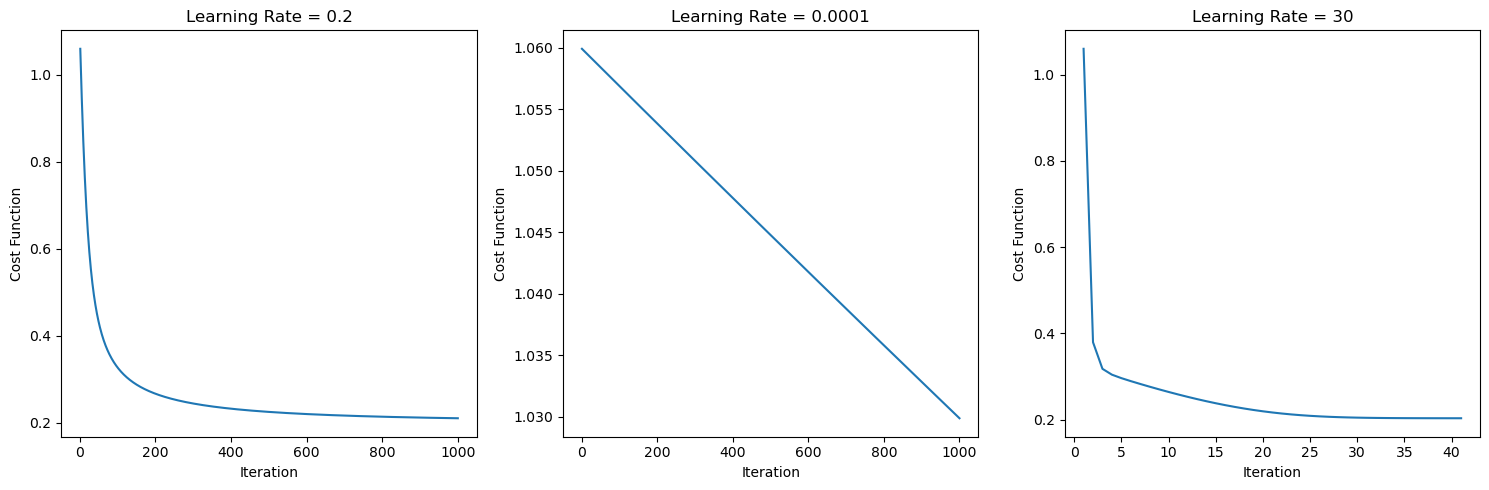

In [69]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
# learning rate phù hợp
axes[0].plot(np.arange(1, count1+1), np.array(list_cost1));
axes[0].set_title('Learning Rate = 0.2');
axes[0].set_xlabel('Iteration');
axes[0].set_ylabel('Cost Function');
# learning rate quá nhỏ
axes[1].plot(np.arange(1, count2+1), np.array(list_cost2));
axes[1].set_title('Learning Rate = 0.0001');
axes[1].set_xlabel('Iteration');
axes[1].set_ylabel('Cost Function');
# learning rate quá lớn
axes[2].plot(np.arange(1,count3+1), np.array(list_cost3));
axes[2].set_title('Learning Rate = 30');
axes[2].set_xlabel('Iteration');
axes[2].set_ylabel('Cost Function');
# Cách đều các đồ thị để nhìn cho đẹp
plt.tight_layout()

## Biểu diễn decision boundary

In [75]:
h, k = theta1[1], theta1[2]

In [76]:
x1_ = np.linspace(-2,2,30)
x2_ = -(h*x1_+theta1[0])/k

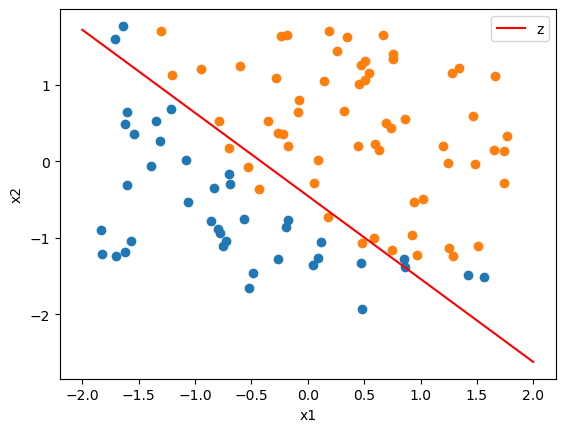

In [77]:
plt.scatter(X_scale[:,1][y==0],X_scale[:,2][y==0]);
plt.scatter(X_scale[:,1][y==1],X_scale[:,2][y==1]);
plt.plot(x1_, x2_, label ='z',color =  'r');
plt.xlabel('x1');
plt.ylabel('x2');
plt.legend();